In [1]:
import os
import glob
import numpy as np
from PIL import Image
from scipy import misc
from scipy import io
import matplotlib.pyplot as plt
import math
import tables
import tensorflow as tf
import time

%matplotlib inline

In [2]:
cwd = os.getcwd()
print(cwd)

D:\Windows\Downloads\University\Senior\KIOST\test2


In [3]:
trimgpath = '/testimg.mat'
trlabpath = '/testlabel.mat'
teimgpath = '/testimg2.mat'
telabpath = '/testlabel2.mat'

In [4]:
trimgmat = io.loadmat(cwd + trimgpath)
trlabmat = io.loadmat(cwd + trlabpath)
teimgmat = io.loadmat(cwd + teimgpath)
telabmat = io.loadmat(cwd + telabpath)

In [5]:
trainimg   = trimgmat['testimage']
trainlabel = trlabmat['testlabel']
testimg    = teimgmat['testimage2']
testlabel   = telabmat['testlabel2']

In [6]:
print(trainimg.shape)
print(trainlabel.shape)
print(testimg.shape)
print(testlabel.shape)


(35721, 6)
(35721, 2)
(63001, 6)
(63001, 2)


In [7]:
size = int(math.sqrt(testimg.shape[0]))
print (size)

251


In [8]:
test0 = testimg[:,0]
test0 = np.reshape(test0, [size, size])
teest0 = np.transpose(test0)

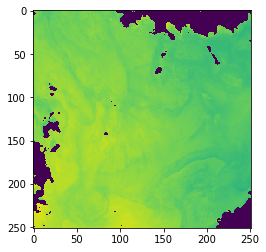

In [9]:
plt.imshow(test0)

In [10]:
def MLP(x):
    
    w1 = tf.Variable(tf.truncated_normal([6, 64], mean = 0.5, stddev = math.sqrt(2/6)))
    b1 = tf.Variable(tf.constant(0.1, shape=[1, 64]))
    act1 = tf.nn.relu(tf.add(tf.matmul(x, w1),b1))
    
    w2 = tf.Variable(tf.truncated_normal([64, 32], mean = 0.5, stddev = math.sqrt(2/64)))
    b2 = tf.Variable(tf.constant(0.1, shape=[1, 32]))
    act2 = tf.nn.relu(tf.add(tf.matmul(act1, w2),b2))
    
    w3 = tf.Variable(tf.truncated_normal([32, 2], mean = 0.5, stddev = math.sqrt(2/32)))
    b3 = tf.Variable(tf.constant(0.1, shape=[1, 2]))
    act3 = tf.nn.relu(tf.add(tf.matmul(act2, w3),b3))
    
    return act3

In [11]:
x = tf.placeholder(tf.float32, [None, 6])

y = tf.placeholder(tf.float32, [None, 2])

In [12]:
learning_rate = 0.001

pred = MLP(x)

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(pred, y))

train_step = tf.train.AdamOptimizer(learning_rate).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(pred,1), tf.argmax(y,1))

accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

In [13]:
sess = tf.Session()

sess.run(tf.global_variables_initializer())



In [14]:
saver = tf.train.Saver()

200
cost =  4.74691458419
Training Accuracy :  0.972
Test Accuracy :  0.935414
400
cost =  4.59304160997
Training Accuracy :  0.984
Test Accuracy :  0.93635
600
cost =  4.6915564537
Training Accuracy :  0.968
Test Accuracy :  0.93716
800
cost =  4.79317440093
Training Accuracy :  0.978
Test Accuracy :  0.938937
1000
cost =  4.45842928067
Training Accuracy :  0.978
Test Accuracy :  0.937842
Training Done
Loop Time :  3.375690217812856 m


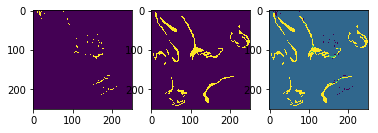

In [65]:

Loopstart = time.time()

for step in range(1000):
    avg_cost = 0.
    num_batch = int(trainimg.shape[0]/500)
    #Stepstart = time.time()
    
    for i in range(num_batch):
        randidx = np.random.randint(trainimg.shape[0], size=500)
        randidx.sort()
        batch_trimg = trainimg[randidx, :]
        batch_trlab = trainlabel[randidx, :]
        sess.run(train_step, feed_dict = {x:batch_trimg, y:batch_trlab})
        avg_cost += sess.run(cross_entropy, feed_dict = {x:batch_trimg, y:batch_trlab})
    
    
    if (step+1)%200 ==0:
        print (step + 1)
        print ("cost = ", avg_cost)
        train_acc = sess.run(accuracy, feed_dict={x: batch_trimg, y: batch_trlab})
        print ('Training Accuracy : ', train_acc)
        test_acc = train_acc = sess.run(accuracy, feed_dict={x: testimg, y: testlabel})
        print ('Test Accuracy : ', test_acc)
        saver.save(sess, cwd + '/checkpoint/mymodel', global_step=step)
        #print ('Step Time : ',(time.time() - Stepstart)/60,'m','\n' )
        
        
print ('Training Done')
print ('Loop Time : ', (time.time() - Loopstart)/60,'m' )

#Predict
predictimg = [testimg, testlabel]
testsize = 251
predict = sess.run(pred, feed_dict={x:predictimg[0]})
result = np.argmax(predict,1)
recon = np.reshape(result, [testsize, testsize])

# Plot
plt.subplot(131)
plt.imshow(recon)
plt.subplot(132)
plt.imshow(np.reshape(predictimg[1][:,1], [testsize, testsize]))
plt.subplot(133)
plt.imshow(np.reshape(predictimg[1][:,1], [testsize, testsize]) - (0.5*recon))
plt.show()
# 노랑 : 적조인데 못맞춘 부분 (1)
# 초록: 적조를 맞춘 부분 (0.5)
# 보라 : 적조라고 잘못판단한 부분 (-0.5)
# 청록 : 적조가 아니라고 맞춘 부분 (0)

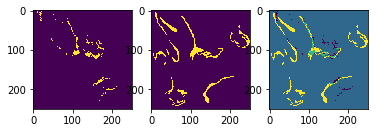

In [56]:
# Test 1

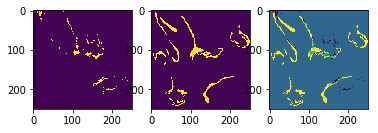

In [60]:
# Test 2

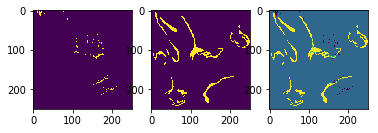

In [63]:
# Test 3

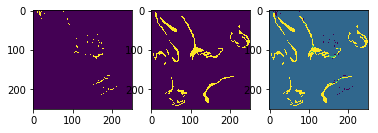

In [66]:
# Test 4

In [57]:
# Test 1

Red tide acc :  17.651612903225804 %
No acc :  98.72475729797382 %
Red tide error :  82.34838709677419 %
No error :  1.2752427020261814 %


In [61]:
# Test 2

Red tide acc :  14.812903225806451 %
No acc :  98.91587457294591 %
Red tide error :  85.18709677419355 %
No error :  1.0841254270540879 %


In [64]:
# Test 3

Red tide acc :  5.858064516129033 %
No acc :  99.42326556844705 %
Red tide error :  94.14193548387097 %
No error :  0.5767344315529547 %


In [67]:
# Test 4

Red tide acc :  6.6322580645161295 %
No acc :  99.49599161113554 %
Red tide error :  93.36774193548388 %
No error :  0.5040083888644589 %
